<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/Emotion_AI_Part1_FacialPoint_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: To Build a Deep Learning Model with CNN and Resudual Blocks <br>
Objective: To Predict Facial Key Points (Crucial to Develop Emotional AI based Applications)<br>
Companies Using Similar Applications: https://www.affectiva.com/what/products/

In [2]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display

# Importing Deep Learning Packages
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K
from keras import optimizers

In [3]:
# Importing the Data
facialpoints_df = pd.read_csv('/content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/KeyFacialPoints.csv')

# Look the Data
facialpoints_df.head().append(facialpoints_df.tail())

left_eye_center_x  ...                                              Image
0             66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1             64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2             65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3             65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4             66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...
2135          67.180378  ...  191 191 191 190 189 185 184 120 54 34 19 24 31...
2136          65.724490  ...  19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137          68.430866  ...  31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138          64.152180  ...  7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139          66.683755  ...  68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...

[10 rows x 31 columns]

In [4]:
# Get the Info of the DataFrame
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Display Sample Image
facialpoints_df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [6]:
# Image values are given as Space seperated Strings, convert the string (1D Array) to image (2D Array)

facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep= ' ').reshape(96,96))
print(f"The Shape of Image column after Transformation is {facialpoints_df['Image'][0].shape}")

The Shape of Image column after Transformation is (96, 96)


In [7]:
# Get the Descriptive Statistics for the Dataset
facialpoints_df.describe()

left_eye_center_x  ...  mouth_center_bottom_lip_y
count        2140.000000  ...                2140.000000
mean           66.221549  ...                  82.630412
std             2.087683  ...                   4.813557
min            47.835757  ...                  57.232296
25%            65.046300  ...                  79.417480
50%            66.129065  ...                  82.388899
75%            67.332093  ...                  85.697976
max            78.013082  ...                  95.808983

[8 rows x 30 columns]

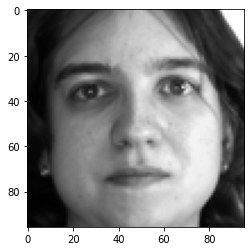

In [8]:
# Plot Random image with Facial Key Points

i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap= 'gray');

Time Taken is: 0.015729188919067383


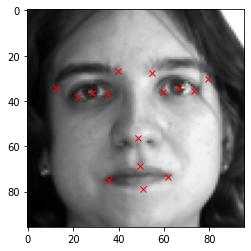

In [9]:
# Visualize the Key Facial Points on the above Image

plt.figure()
plt.imshow(facialpoints_df['Image'][i], cmap= 'gray');

# Go to all X and Y Coordinates and plot them
import time
start = time.time()
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx') # Cols i and j are taken as 0 and 1
stop = time.time()

print("Time Taken is:", stop - start)

Time Taken is: 0.015357255935668945


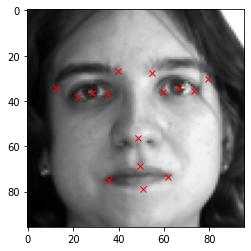

In [10]:
# Try Using List Comprehension
plt.figure()
plt.imshow(facialpoints_df['Image'][i], cmap= 'gray');
start = time.time()

[plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx') for j in range(1,31,2)];

stop = time.time()
print("Time Taken is:", stop - start)

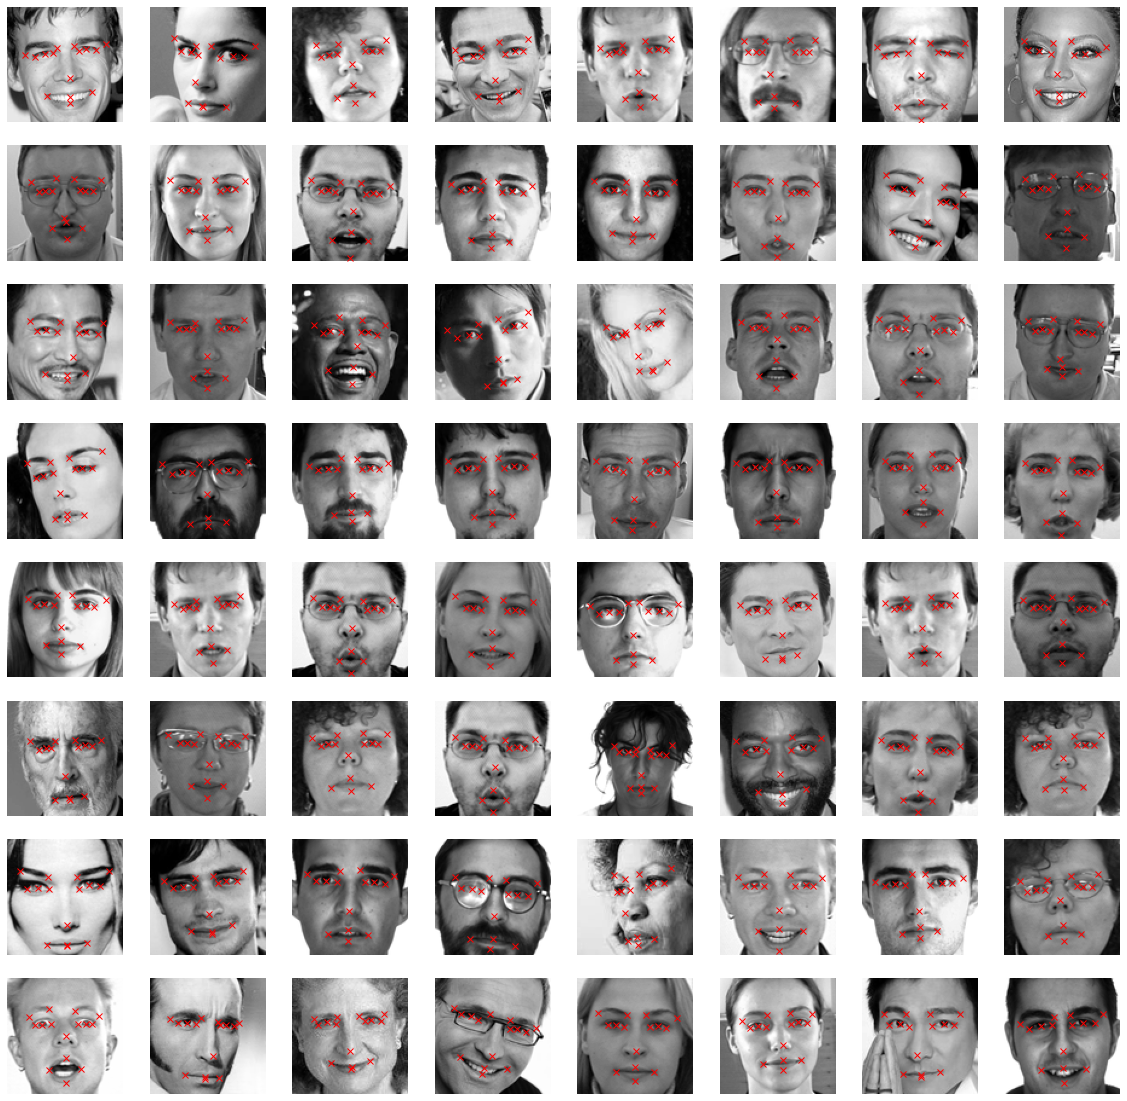

In [11]:
# Visualize a Grid of Image (64)

import random

# Create Grid
fig = plt.figure(figsize= (20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    img = random.randint(1, len(facialpoints_df))
    image = plt.imshow(facialpoints_df['Image'][img], cmap= 'gray')
    [plt.plot(facialpoints_df.loc[img][j-1], facialpoints_df.loc[img][j], 'rx') for j in range(1,31,2)];
    plt.axis('off') # Remove the X and Y Axis

In [12]:
# Performing Image Augmentation - Advantage of Image Augmentation is to increase the Size of the Dataset

# Copy the DataFrame
import copy

facialpoints_df_copy = copy.copy(facialpoints_df)

# Get the Column Names Except Image (Last Column)

columns = facialpoints_df_copy.columns[:-1]
print(f"The Column Names to be used are\n {columns.values}")

The Column Names to be used are
 ['left_eye_center_x' 'left_eye_center_y' 'right_eye_center_x'
 'right_eye_center_y' 'left_eye_inner_corner_x' 'left_eye_inner_corner_y'
 'left_eye_outer_corner_x' 'left_eye_outer_corner_y'
 'right_eye_inner_corner_x' 'right_eye_inner_corner_y'
 'right_eye_outer_corner_x' 'right_eye_outer_corner_y'
 'left_eyebrow_inner_end_x' 'left_eyebrow_inner_end_y'
 'left_eyebrow_outer_end_x' 'left_eyebrow_outer_end_y'
 'right_eyebrow_inner_end_x' 'right_eyebrow_inner_end_y'
 'right_eyebrow_outer_end_x' 'right_eyebrow_outer_end_y' 'nose_tip_x'
 'nose_tip_y' 'mouth_left_corner_x' 'mouth_left_corner_y'
 'mouth_right_corner_x' 'mouth_right_corner_y' 'mouth_center_top_lip_x'
 'mouth_center_top_lip_y' 'mouth_center_bottom_lip_x'
 'mouth_center_bottom_lip_y']


The Pixel Values for the image are shown


array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])


The Image is shown below


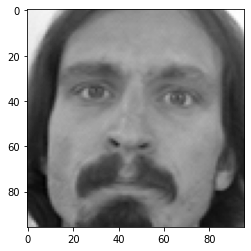

In [13]:
# Performing Augmentation on Image
print("The Pixel Values for the image are shown")
display(facialpoints_df_copy['Image'][0])

print("\nThe Image is shown below")
plt.imshow(facialpoints_df_copy['Image'][0], cmap= 'gray');

The Pixel Values for the image are shown


array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])


The Image is shown below


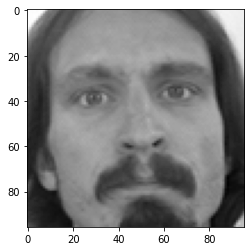

In [14]:
# Flip all the Images in Copy DataFrame Horizontally

facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis= 1))

# Get the After Flipped Values
print("The Pixel Values for the image are shown")
display(facialpoints_df_copy['Image'][0])

print("\nThe Image is shown below")
plt.imshow(facialpoints_df_copy['Image'][0], cmap= 'gray');

In [15]:
# Unfortunately the Y Coordinates are not Flipped, so we need to flip all (Only the X Coordinates Changed) | Y is same
# Do it Only Once else it Multiplies - Do only for Copied (Flipped) Dataset

for i in range(len(columns)):
    # The Change is in X Coordinates only. the Columns with X Coordinates are Even and divisible by 2
    if i % 2 == 0:
        facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x))

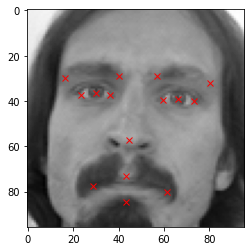

In [16]:
# Visualize the Original Image

plt.imshow(facialpoints_df['Image'][0], cmap= 'gray');

# Go to all X and Y Coordinates and plot them
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx') # Cols i and j are taken as 0 and 1

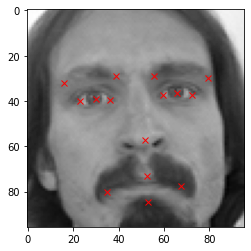

In [17]:
# Visualize the Horizontally Flipped Image

plt.imshow(facialpoints_df_copy['Image'][0], cmap= 'gray');

# Go to all X and Y Coordinates and plot them
for j in range(1,31,2):
    plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx') # Cols i and j are taken as 0 and 1

In [18]:
# Concatenate the Augmented image to Original Dataframe to increase the Size of the Dataset for Training and Test

facialpoints_df_augmented = np.concatenate((facialpoints_df, facialpoints_df_copy))
print(f"The Shape of the Augmented DataFrame is: {facialpoints_df_augmented.shape}")

The Shape of the Augmented DataFrame is: (4280, 31)


In [19]:
# Perform Image Augmentation by Randomly increasing the Brightness. Done by multiplying pixel values between 1 and 2, then clip values between 0 to 255

import random

# Increase the Data Size by Adding Brightness to the Images
facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1,2) * x, 0., 255.))
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
print(f"The Shape of the Augmented DataFrame is: {facialpoints_df_augmented.shape}")

The Shape of the Augmented DataFrame is: (6420, 31)


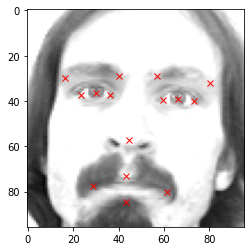

In [20]:
# Viewing the Images with Increased Brightness

plt.imshow(facialpoints_df_copy['Image'][0], cmap= "gray")

for j in range(1, 31, 2):
    plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx'); # rx means red crosses

In [21]:
# Flipping the Images Vertically, Across X Axis

facialpoints_df_copy = copy.copy(facialpoints_df)

# Flip all the Images in Copy DataFrame Horizontally
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis= 0))

# Change the Values for Datasets in the Y Coordinates
for i in range(len(columns)):
    # The Change is in X Coordinates only. the Columns with X Coordinates are Even and divisible by 2
    if i % 2 == 1:
        facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x))

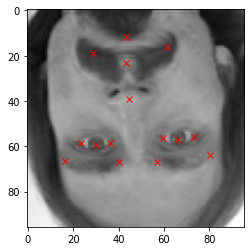

In [22]:
# Visualize the Vertically Flipped Image

plt.imshow(facialpoints_df_copy['Image'][0], cmap= 'gray');

# Go to all X and Y Coordinates and plot them
for j in range(1,31,2):
    plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx') # Cols i and j are taken as 0 and 1

In [23]:
# Add this to New DataFrame

facialpoints_df_augmented_new = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
print(f"The Shape of the New Augmented DataFrame is: {facialpoints_df_augmented_new.shape}")

The Shape of the New Augmented DataFrame is: (8560, 31)


In [24]:
# Preparing the Data for Training - Performing Normalisation

# Image is on 31st column, so by Indexing it is 30th column
img = facialpoints_df_augmented_new[:, 30] # or :-1 will suffice
img = img / 255.

# Create an Empty array of shape (len(img), 96, 96, 1) to train the Model
X = np.empty( (len(img), 96, 96, 1) )

# Iterate through Normalized image list and add values to the Empty Array
for i in range(len(img)):
    # We need to Expand the dimension from (96, 96) to (96, 96, 1)
    X[i, ] = np.expand_dims(img[i], axis= 2) # The following is equivalent to x[np.newaxis, :] or x[np.newaxis] - Create New Dimension
    # the Axis = 2 adds a Dimension in Index 2 -> (len(img), 96, 96, 1)

# Convert Array type to Float32
X = np.asarray(X).astype(np.float32)
print(f"The Shape of the Image Training is: {X.shape}")

The Shape of the Image Training is: (8560, 96, 96, 1)


In [25]:
# Get the Values of Key Facial points Coordinates to be used as Target (Predictors)
y = facialpoints_df_augmented_new[:, :30] # Till the Image Column
y = np.asarray(y).astype(np.float32)
print(f"The Shape of the Facepoints Training is: {y.shape}")

The Shape of the Facepoints Training is: (8560, 30)


In [26]:
# Split the Data to Training and Test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state= 42)
print(f"The Shape of X train is {X_train.shape} and X test is {X_test.shape}")
print(f"The Shape of y train is {y_train.shape} and y test is {y_test.shape}")

The Shape of X train is (7276, 96, 96, 1) and X test is (1284, 96, 96, 1)
The Shape of y train is (7276, 30) and y test is (1284, 30)


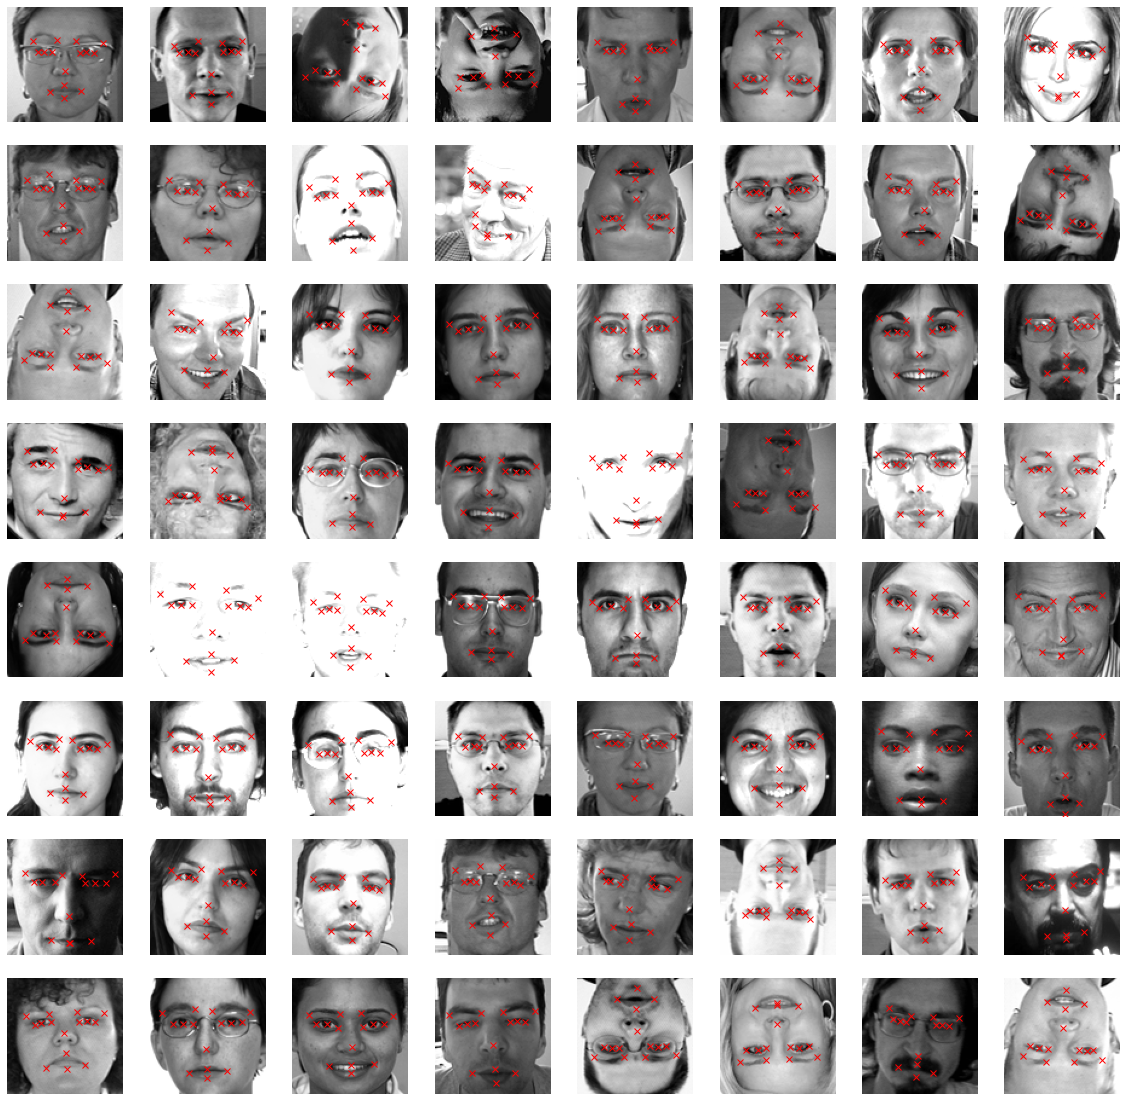

In [27]:
# Randomly Visualize data (64 plots) present in the Training and Test set

fig = plt.figure(figsize= (20,20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    image = plt.imshow(X_train[i].reshape(96,96), cmap= 'gray')
    # Plot the Points
    [plt.plot(y_train[i][j-1], y_train[i][j], 'rx') for j in range(1,31,2) ]
    plt.axis('off')

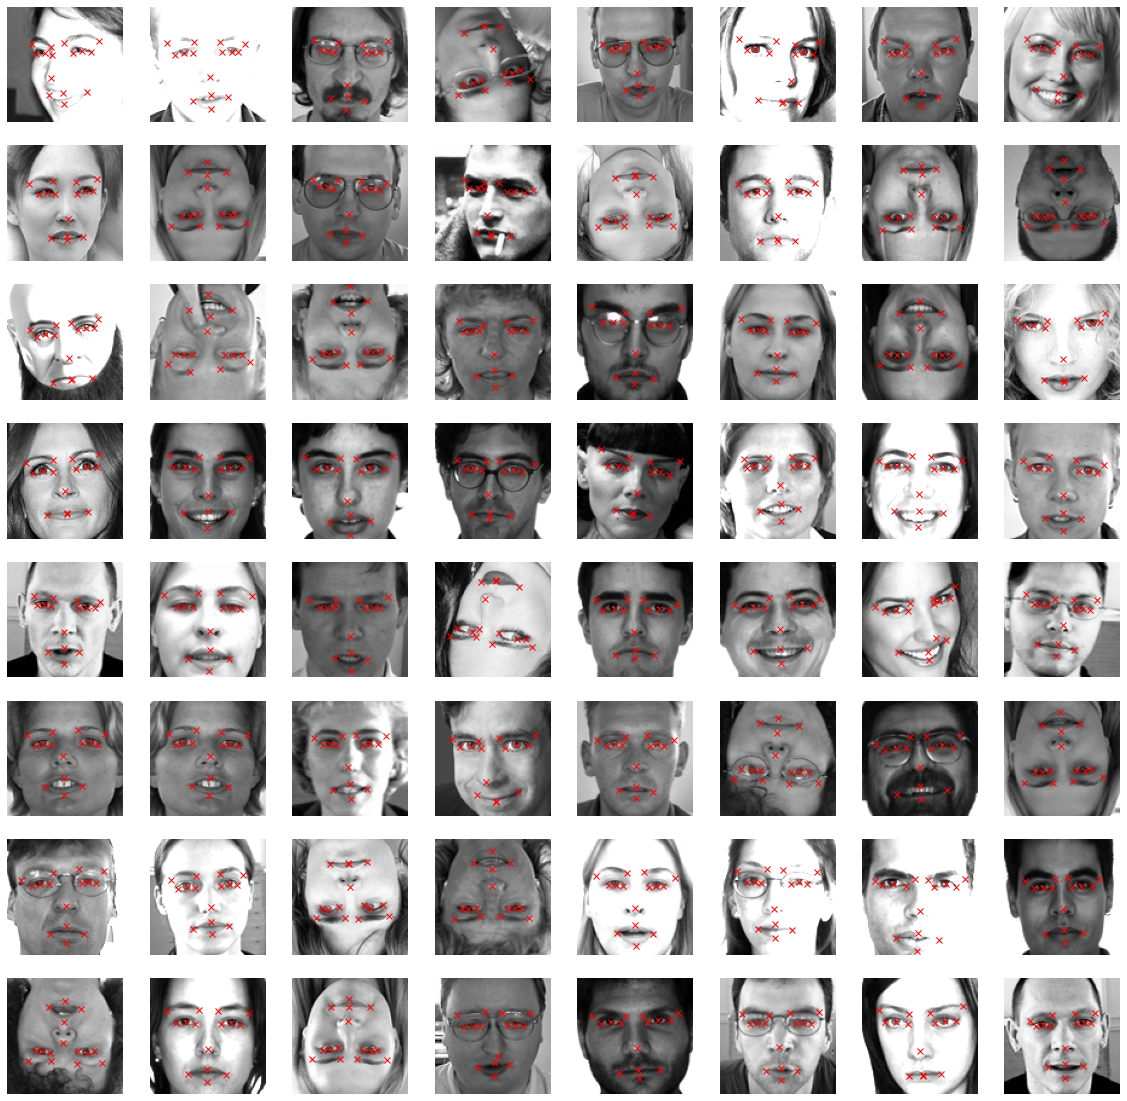

In [28]:
# Plot for Test Set

fig = plt.figure(figsize= (20,20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    image = plt.imshow(X_test[i].reshape(96,96), cmap= 'gray')
    # Plot the Points
    [plt.plot(y_test[i][j-1], y_test[i][j], 'rx') for j in range(1,31,2) ]
    plt.axis('off'); # Remove the Axis

Some Deep Learning Readily Available  Convolutional Neural Networks Models are

- LeNet5 (1998) [Hand Written Classification]
- AlexNet (2012)
- ZFNet (2013)
- GoogleNet/Inception (2014)
- VGGNet (2014)
- ResNet (2015) [Enabled Training of 152 Layers without Vanishing gradient issues, Performed Superior to Humans; Has "Skip Connection Feature"]

In [35]:
# Purpose of the Activation Function is to include Non-Linearity in the Model

# Our Model Architecture - Residual Blocks (Deep Residual Neural Networks)
# For Residual Networks we need to Create Convolution Block, Identity Block, Res-Block and Final model comprising of all Blocks

# Model Building

# Building Res - Block

def res_block(X, filter, stage):

    # Convolution Block
    X_copy = X
    f1, f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1), strides= (1,1), name= "res_"+str(stage)+"_conv_a", kernel_initializer = glorot_uniform(seed= 0)) (X)
    X = MaxPool2D((2,2)) (X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_conv_a") (X)
    X = Activation('relu') (X)
    
    
    X = Conv2D(f2, kernel_size= (3,3), strides= (1,1), padding= 'same', name= "res_"+str(stage)+"_conv_b", kernel_initializer = glorot_uniform(seed= 0)) (X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_conv_b") (X)
    X = Activation('relu') (X)

    X = Conv2D(f3, kernel_size= (1,1), strides= (1,1), padding= 'same', name= "res_"+str(stage)+"_conv_c", kernel_initializer = glorot_uniform(seed= 0)) (X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_conv_c") (X)
    
    # Adding Data from Main Short Path
    X_copy = Conv2D(f3, kernel_size= (1,1), strides= (1,1), padding= 'same', name= "res_"+str(stage)+"_conv_copy", kernel_initializer = glorot_uniform(seed= 0)) (X_copy)
    X_copy = MaxPool2D((2,2)) (X_copy)
    X_copy = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_conv_copy") (X_copy)

    # Adding Data from Main and Short Path
    X = Add() ([X, X_copy])
    X = Activation('relu') (X)

    # Identity Block 1
    X_copy = X

    # Main Path 
    X = Conv2D(f1, (1,1), strides= (1,1), name= "res_"+str(stage)+"_identity_1_a", kernel_initializer= glorot_uniform(seed= 0)) (X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_identity_1_a") (X)
    X = Activation('relu') (X)
    
    X = Conv2D(f2, kernel_size= (3,3), strides= (1,1), padding= "same", name= "res_"+str(stage)+"_identity_1_b", kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_identity_1_b")(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size= (1,1), strides= (1,1), name= "res_"+str(stage)+"_identity_1_c", kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_identity_1_c")(X)

    # Add both X Original and Transformed together (We fees Original Input as is. hence the name Identity)
    X = Add() ([X, X_copy])
    X = Activation('relu') (X)


    # Identity Block 2
    X_copy = X

    # Main Path 
    X = Conv2D(f1, (1,1), strides= (1,1), name= "res_"+str(stage)+"_identity_2_a", kernel_initializer= glorot_uniform(seed= 0)) (X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_identity_2_a") (X)
    X = Activation('relu') (X)
    
    X = Conv2D(f2, kernel_size= (3,3), strides= (1,1), padding= "same", name= "res_"+str(stage)+"_identity_2_b", kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_identity_2_b")(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size= (1,1), strides= (1,1), name= "res_"+str(stage)+"_identity_2_c", kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis= 3, name= "bn_"+str(stage)+"_identity_2_c")(X)

    # Add both X Original and Transformed together (We fees Original Input as is. hence the name Identity)
    X = Add() ([X, X_copy])
    X = Activation('relu') (X)

    return X

In [36]:
# Building the Final Model with for the ResBlock Architecture

input_shape = (96, 96, 1)

# Input Tensor Shape
X_input = Input(input_shape)

# Zero Padding
X = ZeroPadding2D((3,3)) (X_input)

# Stage 1
X = Conv2D(64, (7,7), strides= (2,2), name= "conv1", kernel_initializer = glorot_uniform(seed= 0)) (X)
X = BatchNormalization(axis= 3, name= "bn_conv1") (X)
X = Activation('relu') (X)
X = MaxPool2D((3,3), strides= (2,2)) (X)

# Stage 2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage 3
X = res_block(X, filter= [128,128,512], stage= 3)

# Stage 4 - If Needed Try
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name= "Average_Pooling") (X)

# Final Layers
X = Flatten() (X)
X = Dense(4096, activation= "relu") (X)
X = Dropout(0.2) (X)
X = Dense(2048, activation= 'relu') (X)
X = Dropout(0.1) (X)

# Output
X = Dense(30, activation= "relu") (X)

# Summarize and Show Model Architecture
model = Model(inputs= X_input, outputs= X)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 102, 102, 1)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [37]:
# We have 18 Million Trainable Parameters

# Compile and Train the Deep Learning Model

# Optimizer
adam = tf.keras.optimizers.Adam(lr= 0.001, beta_1= 0.9, beta_2= 0.999, amsgrad= False)
model.compile(loss= "mean_squared_error", metrics= ['accuracy'], optimizer= adam)

# Save Best Model with least Validation_Loss
filepath = '/content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/weights/weights.hdf5'
checkpoint = ModelCheckpoint(filepath= filepath, monitor="val_loss", verbose= 1, save_best_only= True)

In [38]:
# Training the Model

history = model.fit(X_train, y_train, batch_size= 32, epochs= 100, validation_split= 0.1, callbacks= [checkpoint])

Epoch 1/100
205/205 [==============================] - ETA: 0s - loss: 211.9183 - accuracy: 0.6258
Epoch 00001: val_loss improved from inf to 554.45331, saving model to /content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/weights/weights.hdf5
205/205 [==============================] - 6s 27ms/step - loss: 211.9183 - accuracy: 0.6258 - val_loss: 554.4533 - val_accuracy: 0.5989
Epoch 2/100
205/205 [==============================] - ETA: 0s - loss: 114.6824 - accuracy: 0.7108
Epoch 00002: val_loss improved from 554.45331 to 124.87254, saving model to /content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/weights/weights.hdf5
205/205 [==============================] - 5s 24ms/step - loss: 114.6824 - accuracy: 0.7108 - val_loss: 124.8725 - val_accuracy: 0.7321
Epoch 3/100
205/205 [==============================] - ETA: 0s - loss: 60.7234 - accuracy: 0.7129
Epoch 00003: val_loss improved from 124.87254 to 57.30976, saving model to /content/drive/My Dri

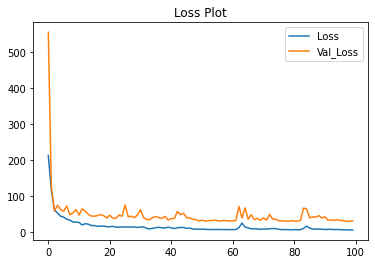

In [39]:
# Plot what's Returned by model.fit()

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val_Loss")
plt.title("Loss Plot")
plt.legend();


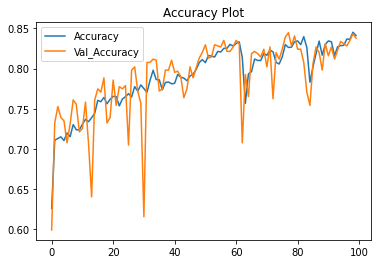

In [40]:

# Plot the Accuracy
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val_Accuracy")
plt.title("Accuracy Plot")
plt.legend();

In [42]:
# Save the Complete Trained Model in Json File

model_json = model.to_json()

with open('/content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/weights/keypointdetector_ResblockModel.json', 'w') as json_file:
    json_file.write(model_json)

In [43]:
# Assessing the Performance of the Trained Model

# Load the Architecture Trained Model
with open('/content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/weights/keypointdetector_ResblockModel.json', 'r') as json_file:
    json_SavedModel = json_file.read()

models = tf.keras.models.model_from_json(json_SavedModel)

# Load the Weights of the Trained Model
model.load_weights('/content/drive/My Drive/Projects/Emotion AI - Facial Key_points Detection/weights/weights.hdf5')

# Compile the Model
adam = tf.keras.optimizers.Adam(lr= 0.001, beta_1= 0.9, beta_2= 0.999, amsgrad= False)
model.compile(loss= "mean_squared_error", optimizer= adam, metrics= ['accuracy'])

In [44]:
# Evaluating the Model
result = model.evaluate(X_test, y_test)
print(f"The Model Accuracy is: {result[1]:.2f} and Loss is: {result[0]:.2f}")

41/41 [==============================] - 0s 9ms/step - loss: 27.5450 - accuracy: 0.8341
The Model Accuracy is: 0.83 and Loss is: 27.55


In [45]:
# Make Predictions using the Test Dataset
df_predict = model.predict(X_test)

In [46]:
# Check the Metrics

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, df_predict))
print(f"The Root Mean Square Error (RMSE) Value is {rmse:.4f}")

The Root Mean Square Error (RMSE) Value is 5.2483


In [47]:
# Make a DataFrame out of Predicted Values

df_predict = pd.DataFrame(df_predict, columns= columns) # columns is Specified Above

# Validate the dataFrame
df_predict.head().append(df_predict.tail())

left_eye_center_x  ...  mouth_center_bottom_lip_y
0             61.522537  ...                  79.776207
1             66.839081  ...                  85.078125
2             65.306175  ...                  84.959892
3             65.930794  ...                  15.170758
4             31.234163  ...                  70.376923
1279          65.701904  ...                  90.714607
1280          62.931458  ...                  18.506363
1281          65.854507  ...                  10.845110
1282          66.383408  ...                  88.652184
1283          65.788750  ...                  78.748055

[10 rows x 30 columns]

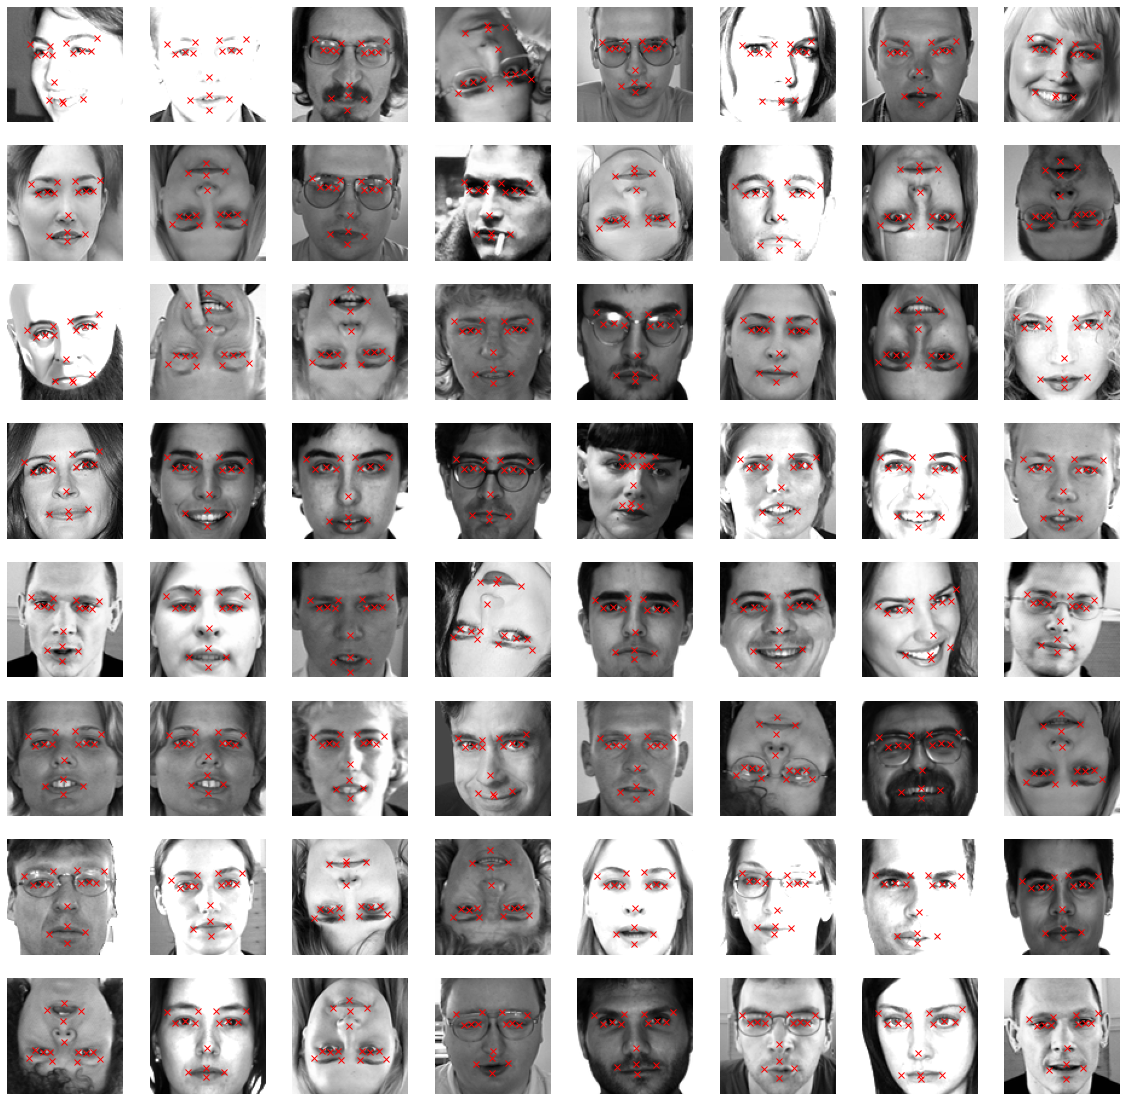

In [48]:
# Plot the Test Images and their Predicted KeyPoints

fig = plt.figure(figsize= (20,20))

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    # use Squeeze to Convert the shape from (96,96,1) to (96,96). or just use .reshape(96,96)
    plt.imshow(X_test[i].squeeze(), cmap= "gray")
    # Use without List Comprehension to plot the Predicted points
    for j in range(1,31,2):
        plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx') # 'rx' is Red Cross
    plt.axis('off')